First project in driverless car Smartcab project 1. Code below and in github as the compiled .py file in the github repository file named agentO.cpy. I am controlling the red car. I have set display to False in the notebook so the simulator can be run inside the notebook. I do not know how to get pygames visual to play inside the notebook and it kept crashing the Kernel so I set display to False and run the display True in the command line for the visual on my computer.

QUESTION1: Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

Actions requested in project:To complete this task, simply have your driving agent choose a random action from the set of possible actions (None, 'forward', 'left', 'right') at each intersection, disregarding the input information above. Set the simulation deadline enforcement, enforce_deadline to False and observe how it performs.

Answer:I changed the line 44 enforce_deadline=False (was previously set to =True); I implemented line 28 action='forward'. When the code was implemented the red car being controlled moved in the forward direction to the end of the grid. The destination is set in code line 15 as destination= None so the car did  make it to the None destination which is continue to move forward until you can't move forward. Interesting observations: After the car reached the end of the grid it moved in reverse to the starting position and moved forward again. The forward action continued regardless of other cars being in the way. This is sub-optimal in a real world situation. The reward as you can see below was -0.5

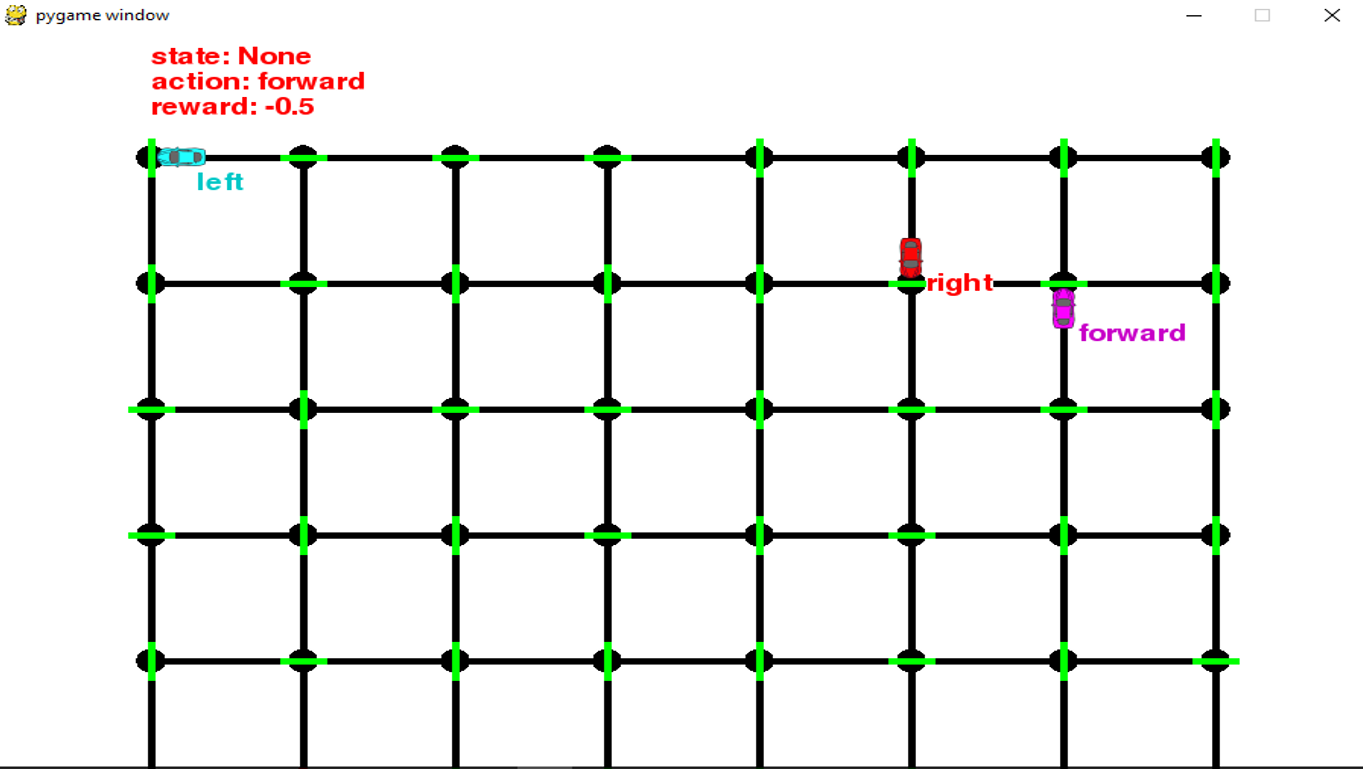

In [4]:
from IPython.core.display import Image
Image(filename=('smartcab1.png'))
Image(filename='smartcab1.png',width=500,height=300)

In [4]:
#code from project1 see file in repository named: agentO.cpy
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        # TODO: Initialize any additional variables here

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required

    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)

        # TODO: Update state
        
        # TODO: Select action according to your policy
        action = 'forward'

        # Execute action and get reward
        reward = self.env.act(self, action)

        # TODO: Learn policy based on state, action, reward

        print "LearningAgent.update(): deadline = {}, inputs = {}, action = {}, reward = {}".format(deadline, inputs, action, reward)  # [debug]


def run():
    """Run the agent for a finite number of trials."""

    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=False)  # specify agent to track
    # NOTE: You can set enforce_deadline=False while debugging to allow longer trials

    # Now simulate it
    sim = Simulator(e, update_delay=0.5, display=False)  # create simulator (uses pygame when display=True, if available)
    # NOTE: To speed up simulation, reduce update_delay and/or set display=False

    sim.run(n_trials=10)  # run for a specified number of trials
    # NOTE: To quit midway, press Esc or close pygame window, or hit Ctrl+C on the command-line


if __name__ == '__main__':

    
    run()


Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (6, 6), destination = (6, 2), deadline = 20
RoutePlanner.route_to(): destination = (6, 2)
LearningAgent.update(): deadline = 20, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -0.5
LearningAgent.update(): deadline = 19, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -0.5
LearningAgent.update(): deadline = 18, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 17, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 16, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -0.5
LearningAgent.update(): deadline = 15, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left':

Question 2
QUESTION: What states have you identified that are appropriate for modeling
 the smartcab and environment? Why do you believe each of these states to be
 appropriate for this problem?

OPTIONAL: How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

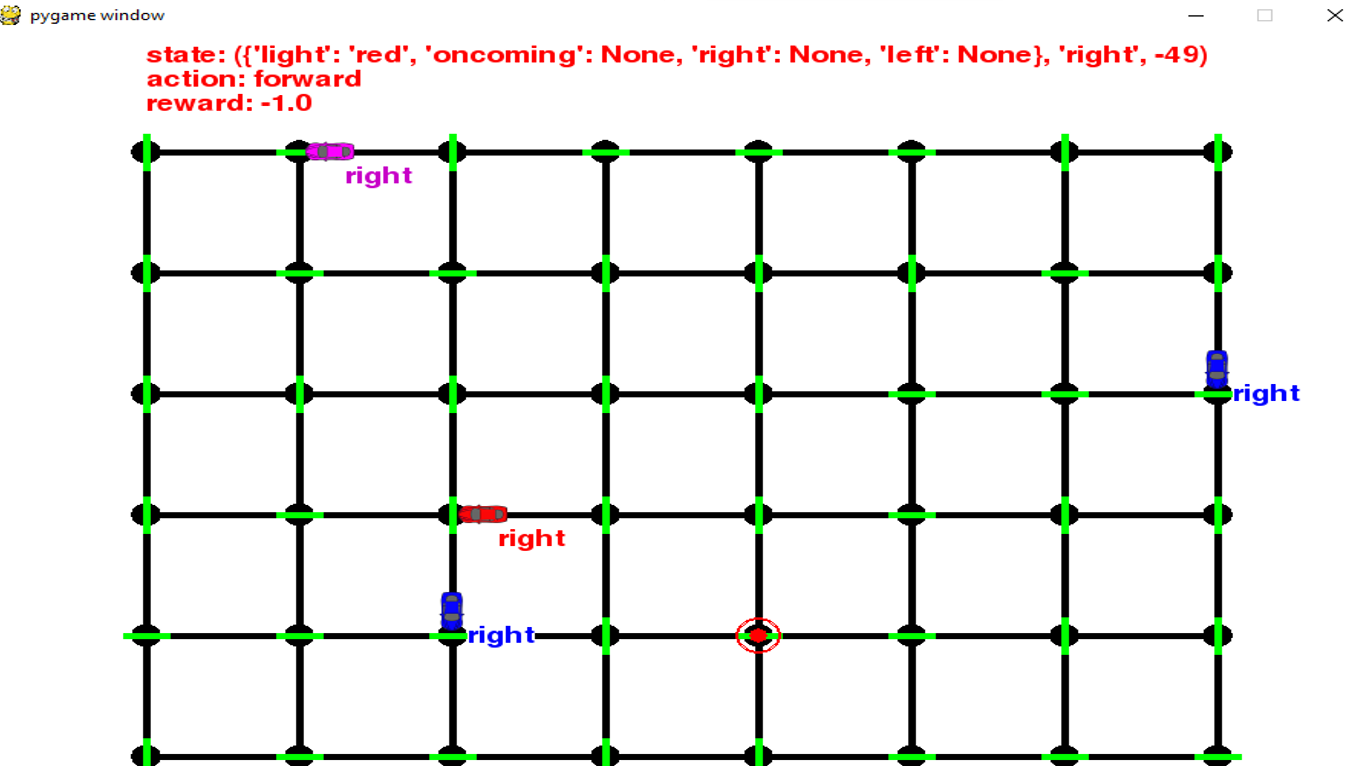

In [15]:
from IPython.core.display import Image
Image(filename=('stateChange1.png'))
Image(filename='stateChange1.png',width=500,height=300)

First I changed the state to valid_states = True and the lights changed and on coming traffic moved through the scene. The states appear to be light,oncoming,right,left,right. Light appears to have the vairiables red or green, oncoming apears to have the variables left or right; and right/left appear to have the variable None. There appears to be an addional right variable outside of the state array that has a value of -49 I am not sure what this realtes to.(See this code below and run the cell to get the outpu. note sim display is set to False because it crushes my kernel when the simulator rolls up and cannot find the car images,then pygame stops responding. The full game with the simulator is run through the command line with display True then display turned off to run code in the notebook here. This will be true for all the results in the notebook. Additional note: enforce_deadline has been set to False but the environment is still obeying the deadline (see below). I could not perceive a difference between the valid states being True or false.I think the state changes might need to be instantiated through code based upon the environment states, accounting for the self current state and the destination. Not sure how to accomplish this. But I think that is the goal to reach the destination and not crash within the time alloted by coding decisions into a Q value that gets instantiated.

Code for valid_states = True
file named agentB.py

In [1]:
#Can run the cell to see the results
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        # TODO: Initialize any additional variables here

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required

    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        

        # TODO: Update state
        self.state = (inputs,self.next_waypoint,deadline)
        valid_states = True
        # TODO: Select action according to your policy
        action = 'forward'

        # Execute action and get reward
        reward = self.env.act(self, action)

        # TODO: Learn policy based on state, action, reward

        print "LearningAgent.update(): deadline = {}, inputs = {}, action = {}, reward = {}".format(deadline, inputs, action, reward)  # [debug]


def run():
    """Run the agent for a finite number of trials."""

    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=False)  # specify agent to track
    # NOTE: You can set enforce_deadline=False while debugging to allow longer trials

    # Now simulate it
    sim = Simulator(e, update_delay=0.5, display=False)  # create simulator (uses pygame when display=True, if available)
    # NOTE: To speed up simulation, reduce update_delay and/or set display=False

    sim.run(n_trials=5)  # run for a specified number of trials
    # NOTE: To quit midway, press Esc or close pygame window, or hit Ctrl+C on the command-line


if __name__ == '__main__':
    run()

Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (2, 5), destination = (6, 3), deadline = 30
RoutePlanner.route_to(): destination = (6, 3)
LearningAgent.update(): deadline = 30, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = 2.0
LearningAgent.update(): deadline = 29, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = 2.0
LearningAgent.update(): deadline = 28, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 27, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 26, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 25, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': Non

Now running valid_states = False to determine the diffence in state change

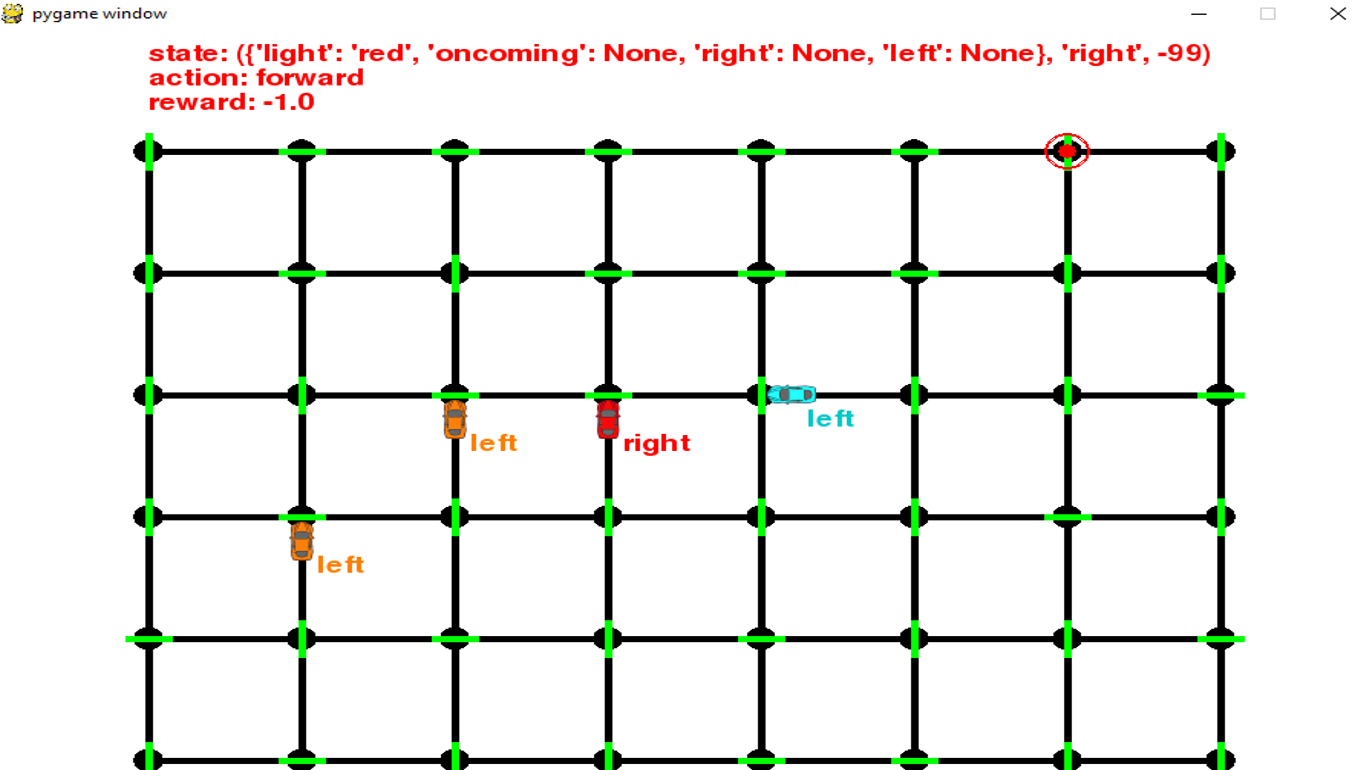

In [4]:
from IPython.core.display import Image
Image(filename=('stateChange2.png'))
Image(filename='stateChange2.png',width=500,height=300)

Running valid_states = False
file named agentC.py

In [2]:
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        # TODO: Initialize any additional variables here

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required

    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        

        # TODO: Update state
        self.state = (inputs,self.next_waypoint,deadline)
        valid_states = False
        # TODO: Select action according to your policy
        action = 'forward'

        # Execute action and get reward
        reward = self.env.act(self, action)

        # TODO: Learn policy based on state, action, reward

        print "LearningAgent.update(): deadline = {}, inputs = {}, action = {}, reward = {}".format(deadline, inputs, action, reward)  # [debug]


def run():
    """Run the agent for a finite number of trials."""

    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=False)  # specify agent to track
    # NOTE: You can set enforce_deadline=False while debugging to allow longer trials

    # Now simulate it
    sim = Simulator(e, update_delay=0.5, display=False)  # create simulator (uses pygame when display=True, if available)
    # NOTE: To speed up simulation, reduce update_delay and/or set display=False

    sim.run(n_trials=5)  # run for a specified number of trials
    # NOTE: To quit midway, press Esc or close pygame window, or hit Ctrl+C on the command-line


if __name__ == '__main__':
    run()


Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (5, 2), destination = (8, 6), deadline = 35
RoutePlanner.route_to(): destination = (8, 6)
LearningAgent.update(): deadline = 35, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 34, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 33, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 32, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 31, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 30, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}

Each action taken by the smartcab will produce a reward which depends on the state of the environment. The Q-Learning driving agent will need to consider these rewards when updating the Q-values. Once implemented, set the simulation deadline enforcement enforce_deadline to True. Run the simulation and observe how the smartcab moves about the environment in each trial.

The formulas for updating Q-values can be found in this video.

QUESTION: What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

I found the car did not correctly show where the light was positioned and randomly crashed into oncoming traffic at a higher rate than previosly observed. I am not sure why this behavior has occured by chaning the enforce_deadline to True. It possibly maybe due to the program only using the deadline for reward justfication and not other variables such as arriving at destination, no crashes etc.

In [1]:
#cell for code above file agentD.py enforce_deadline=True
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        # TODO: Initialize any additional variables here

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required

    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        

        # TODO: Update state
        self.state = (inputs,self.next_waypoint,deadline)
        
        # TODO: Select action according to your policy
        action = 'forward'

        # Execute action and get reward
        reward = self.env.act(self, action)

        # TODO: Learn policy based on state, action, reward

        print "LearningAgent.update(): deadline = {}, inputs = {}, action = {}, reward = {}".format(deadline, inputs, action, reward)  # [debug]


def run():
    """Run the agent for a finite number of trials."""

    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # specify agent to track
    # NOTE: You can set enforce_deadline=False while debugging to allow longer trials

    # Now simulate it
    sim = Simulator(e, update_delay=0.5, display=False)  # create simulator (uses pygame when display=True, if available)
    # NOTE: To speed up simulation, reduce update_delay and/or set display=False

    sim.run(n_trials=2)  # run for a specified number of trials
    # NOTE: To quit midway, press Esc or close pygame window, or hit Ctrl+C on the command-line


if __name__ == '__main__':
    run()


Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (3, 6), destination = (4, 3), deadline = 20
RoutePlanner.route_to(): destination = (4, 3)
LearningAgent.update(): deadline = 20, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 19, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 18, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 17, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -1.0
LearningAgent.update(): deadline = 16, inputs = {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, action = forward, reward = -0.5
LearningAgent.update(): deadline = 15, inputs = {'light': 'red', 'oncoming': None, 'right': None, 'left': None}

Improve the Q-Learning Driving Agent

Your final task for this project is to enhance your driving agent so that, after sufficient training, the smartcab is able to reach the destination within the allotted time safely and efficiently. Parameters in the Q-Learning algorithm, such as the learning rate (alpha), the discount factor (gamma) and the exploration rate (epsilon) all contribute to the driving agent?s ability to learn the best action for each state. To improve on the success of your smartcab:

Set the number of trials, n_trials, in the simulation to 100.
Run the simulation with the deadline enforcement enforce_deadline set to True (you will need to reduce the update delay update_delay and set the display to False).
Observe the driving agent?s learning and smartcab?s success rate, particularly during the later trials.
Adjust one or several of the above parameters and iterate this process.
This task is complete once you have arrived at what you determine is the best combination of parameters required for your driving agent to learn successfully.

QUESTION: Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform? Best run successfully trained on trial 5 Simulator.run(): Trial 5
Environment.reset(): Trial set up with start = (6, 2), destination = (1, 5), deadline = 40
RoutePlanner.route_to(): destination = (1, 5);policy choice
['forward', 'left', 'right', None]self.alpha    = 0.9
        self.epsilon  = 0.0 
        self.gamma    = 0.35
Tried a Boosted approach with the first code running a random based Q value policy and following with a best Q value inplementation. The Boosted Q value resulted in sucess in first trial with a 0.5 penalty rate:
Environment.act(): Primary agent has reached destination!
success/total = 1/1 of 1 trials (net reward: 15.0)
penalties/moves (penalty rate): 9/18 (0.5)
LearningAgent.update(): deadline = 13, inputs = {'light': 'red', 'waypoint': 'right'}, action = right, reward = 12.0

After 100 trials of the Boosted Q value the results were:
Environment.act(): Primary agent has reached destination!
success/total = 97/100 of 1 trials (net reward: 2184.0)
penalties/moves (penalty rate): 111/1382 (0.08)

QUESTION: Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem? 
Answer: The agent does reach the destination before the deadline.The agent did not find a zero penalty policy. Even after extending the trial rate to 400 the penalty rate increased to 0.09 in 5,801 moves based upon a randomly changing environment 
Environment.act(): Primary agent has reached destination!
success/total = 389/400 of 1 trials (net reward: 9216.0)
penalties/moves (penalty rate): 551/5801 (0.09)
The optimal policy is defined as Q'(S,A) <---r + gamma Max a Q(s',a')
where S=state s'=state you end up in
A=action we just experienced a'=all the actions you could take
r=reward
Q'=estimate of Q
and consider trying simulated annealing when stuck
T'(S)=argmaxQ'(S,A) w.p 1-E where epsilon is as small as possible
lowering epsilon from 0.35 to 0.15 increased the success rate to 99/100 however the penalties increased from 111 to 130/1,283 moves=0.1
Environment.act(): Primary agent has reached destination!
success/total = 99/100 of 1 trials (net reward: 2230.0)
penalties/moves (penalty rate): 130/1283 (0.1)
I was able to lower the penalty to 0.06 while maintaining a 99/100 success rate by setting the discount to 0.15 and the gamma to 0.15
Environment.act(): Primary agent has reached destination!
success/total = 99/100 of 1 trials (net reward: 2264.5)
penalties/moves (penalty rate): 95/1474 (0.06)

In [48]:
#file agentE.py implimenting above changes. run code to see results
import  random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import math
from collections import namedtuple
import pprint
from scipy import constants as sc

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world using Q learning"""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # OverflowError(" error")ide color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        ##initialize q table here
        self.qDict = dict()
        self.alpha    = 0.9 #alpha is the learning rate
        self.epsilon  = 0.0 #epsilon is the exploratory rate
        self.gamma    = 0.35 # gamma is the discount factor
        self.discount = self.gamma
        self.previous_state = None
        self.state = None
        self.previous_action = None
        self.deadline = self.env.get_deadline(self)       
        self.previous_reward = None
        self.cumulativeRewards = 0


    def Toss(self, p ):
        r = random.random()
        return r < p

    def reset(self, destination=None):
        self.planner.route_to(destination)
        self.previous_state = None
        self.state = None
        self.previous_action = None
        self.epsilon = 0.0 # we want epilon as samll as possible https://www.udacity.com/course/viewer#!/c-ud728-nd/l-5446820041/m-634899065
        self.cumulativeRewards = 0

    def actionsCanTake(self, state):
        return ['forward', 'left', 'right', None]

    def getQValue(self, state, action):
        return self.qDict.get((state, action), 20.0) 

    def getValue(self, state):
        legalActions = self.actionsCanTake(state) 
        bestQValue = - 999999999
        
        for action in legalActions:
            if(self.getQValue(state, action) > bestQValue):
                bestQValue = self.getQValue(state, action)

        return bestQValue
    print 'bestQValue'

    def getPolicy(self, state):
        legalActions = self.actionsCanTake(state)  
        bestAction = None
        bestQValue = - 999999999
        for action in legalActions:
            if(self.getQValue(state, action) > bestQValue):
                bestQValue = self.getQValue(state, action)
                bestAction = action
            if(self.getQValue(state, action) == bestQValue):
                if(self.Toss(.5)):
                    bestQValue = self.getQValue(state, action)
                    bestAction = action
        return bestAction

    def makeState(self, state):
        State = namedtuple("State", ["light","next_waypoint"])
        return State(light = state['light'],
                        next_waypoint = self.planner.next_waypoint())
    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)

        #current state'S"
        self.state = self.makeState(self.env.sense(self))

        # TODO: Select action according to your policy
        action = self.getAction(self.state)

        #execute action and get reward
        reward = self.env.act(self, action)

        if self.previous_reward!= None:
            self.updateQTable(self.previous_state,self.previous_action,self.state,self.previous_reward)
        self.previous_action = action
        self.previous_state = self.state
        self.previous_reward = reward
        self.cumulativeRewards += reward
    



    def getAction(self, state):
        legalActions = self.actionsCanTake(state)  
        action = None
        if (self.Toss(self.epsilon)):
            print "random choice"
            action = random.choice(actionsCanTake)
        else:
            print "Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35"
            action = self.getPolicy(state)
        return action

    def updateQTable(self, state, action, nextState, reward):
       
        if((state, action) not in self.qDict): 
            self.qDict[(state, action)] = 20.0
        else:
            self.qDict[(state, action)] = self.qDict[(state, action)] + self.alpha*(reward + self.discount*self.getValue(nextState) - self.qDict[(state, action)])
            
#print "LearningAgent.updateQTable(): self = {}, state = {}, action = {}, reward = {}".format(self, state, action,nextState, reward)

def run():
   """Run the agent for a finite number of trials.""" 

    # Set up environment and agent
    
e = Environment()  # create environment (also adds some dummy traffic)
a = e.create_agent(LearningAgent)  # create agent
e.set_primary_agent(a, enforce_deadline=True)  # set agent to track

    # Now simulate it
sim = Simulator(e, update_delay=0, display=False)  # reduce update_delay to speed up simulation
sim.run(n_trials=100)  # press Esc or close pygame window to quit
    # code assistance from rahulravindran and jaycode

if __name__ == '__main__':
    run()


bestQValue
Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (2, 6), destination = (1, 1), deadline = 30
RoutePlanner.route_to(): destination = (1, 1)
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35
Running policy choice

Refined code to print wanted parameters obtained

Attempted a Boost approach random based Q policy followed by find best Q policy 

In [3]:
#file agentE.py implimenting above changes. run code to see results
import  random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator

import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import math
from collections import namedtuple
import pprint
from scipy import constants as sc

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world using Q learning"""

    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # OverflowError(" error")ide color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        ##initialize q table here
        self.qDict = dict()
        self.alpha    = 0.9
        self.epsilon  = 0.0 
        self.gamma    = 0.15 #tried changing gamma
        self.discount = 0.15
        self.previous_state = None
        self.state = None
        self.previous_action = None
        self.deadline = self.env.get_deadline(self)       
        self.previous_reward = None
        self.cumulativeRewards = 0


    def Toss(self, p ):
        r = random.random()
        return r < p

    def reset(self, destination=None):
        self.planner.route_to(destination)
        self.previous_state = None
        self.state = None
        self.previous_action = None
        self.epsilon = 0.0 # we want epilon as samll as possible https://www.udacity.com/course/viewer#!/c-ud728-nd/l-5446820041/m-634899065
        self.cumulativeRewards = 0

    def actionsCanTake(self, state):
        return ['forward', 'left', 'right', None]

    def getQValue(self, state, action):
        return self.qDict.get((state, action), 20.0) 

    def getValue(self, state):
        legalActions = self.actionsCanTake(state) 
        bestQValue = - 999999999
        
        for action in legalActions:
            if(self.getQValue(state, action) > bestQValue):
                bestQValue = self.getQValue(state, action)

        return bestQValue
    print 'bestQValue'

    def getPolicy(self, state):
        legalActions = self.actionsCanTake(state)  
        bestAction = None
        bestQValue = - 999999999
        for action in legalActions:
            if(self.getQValue(state, action) > bestQValue):
                bestQValue = self.getQValue(state, action)
                bestAction = action
            if(self.getQValue(state, action) == bestQValue):
                if(self.Toss(.5)):
                    bestQValue = self.getQValue(state, action)
                    bestAction = action
        return bestAction

    def makeState(self, state):
        State = namedtuple("State", ["light","next_waypoint"])
        return State(light = state['light'],
                        next_waypoint = self.planner.next_waypoint())
    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)

        #current state'S"
        self.state = self.makeState(self.env.sense(self))

        # TODO: Select action according to your policy
        action = self.getAction(self.state)

        #execute action and get reward
        reward = self.env.act(self, action)

        if self.previous_reward!= None:
            self.updateQTable(self.previous_state,self.previous_action,self.state,self.previous_reward)
        self.previous_action = action
        self.previous_state = self.state
        self.previous_reward = reward
        self.cumulativeRewards += reward
    



    def getAction(self, state):
        legalActions = self.actionsCanTake(state)  
        action = None
        if (self.Toss(self.epsilon)):
            print "random choice"
            action = random.choice(actionsCanTake)
        else:
            print "Running policy choice. Policy= alpha=0.9;epsilon=0;gamma=0.35"
            action = self.getPolicy(state)
        return action

    def updateQTable(self, state, action, nextState, reward):
       
        if((state, action) not in self.qDict): 
            self.qDict[(state, action)] = 20.0
        else:
            self.qDict[(state, action)] = self.qDict[(state, action)] + self.alpha*(reward + self.discount*self.getValue(nextState) - self.qDict[(state, action)])
            
#print "LearningAgent.updateQTable(): self = {}, state = {}, action = {}, reward = {}".format(self, state, action,nextState, reward)   
import pdb
from environment import Agent, TrafficLight
import operator

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""

    def __init__(self, env, trials=1):
        super(LearningAgent, self).__init__(env)  # sets self.env = env, state = None, next_waypoint = None, and a default color
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        # TODO: Initialize any additional variables here
        self.learning_rate = 0.8
        self.Q = {}
        self.default_Q = 1
        self.discount_factor = 0.15
        self.epsilon = 0.1 
        self.success = 0
        self.total = 0
        self.trials = trials
        self.penalties = 0
        self.moves = 0
        self.net_reward = 0

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required
        self.prev_state = None
        self.prev_action = None
        self.prev_reward = None

    def update(self, t):
        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)

        # TODO: Update state
        inputs['waypoint'] = self.next_waypoint
        del inputs['oncoming']
        del inputs['left']
        del inputs['right']
        self.state = tuple(sorted(inputs.items()))

        _Q, action = self._select_Q_action(self.state)

        # Execute action and get reward
        reward = self.env.act(self, action)

        # Some stats
        self.net_reward += reward
        self.moves += 1
        if reward < 0:
            self.penalties+= 1

        add_total = False
        if deadline == 0:
            add_total = True
        if reward > 5:
            self.success += 1
            add_total = True
        if add_total:
            self.total += 1
            print self._more_stats()

        # TODO: Learn policy based on state, action, reward

        if self.prev_state != None:
            if (self.prev_state, self.prev_action) not in self.Q:
                self.Q[(self.prev_state, self.prev_action)] = self.default_Q
            self.Q[(self.prev_state,self.prev_action)] = (1 - self.learning_rate) * self.Q[(self.prev_state,self.prev_action)] + \
            self.learning_rate * (self.prev_reward + self.discount_factor * \
                self._select_Q_action(self.state)[0])
        self.prev_state = self.state
        self.prev_action = action
        self.prev_reward = reward

        self.env.status_text += ' ' + self._more_stats()

        print "LearningAgent.update(): deadline = {}, inputs = {}, action = {}, reward = {}".format(deadline, inputs, action, reward)  # [debug]

    def _more_stats(self):
        """Get additional stats"""
        return "success/total = {}/{} of {} trials (net reward: {})\npenalties/moves (penalty rate): {}/{} ({})".format(
                self.success, self.total, self.trials, self.net_reward, self.penalties, self.moves, round(float(self.penalties)/float(self.moves), 2))

    def _select_Q_action(self, state):
        
        best_action = random.choice(Environment.valid_actions)
        if self._random_pick(self.epsilon):
            max_Q = self._get_Q(state, best_action)
        else:
            max_Q = -999999
            for action in Environment.valid_actions:
                Q = self._get_Q(state, action)
                if Q > max_Q:
                    max_Q = Q
                    best_action = action
                elif Q == max_Q:
                    if self._random_pick(0.5):
                        best_action = action
        return (max_Q, best_action)


    def _get_Q(self, state, action):
       
        return self.Q.get((state, action), self.default_Q)

    def _random_pick(self, epsilon=0.5):
        
        return random.random() < epsilon

def run():
    """Run the agent for a finite number of trials."""

    
    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # set agent to track

    # Now simulate it
    sim = Simulator(e, update_delay=0.00000001, display=False)  # reduce update_delay to speed up simulation
    sim.run(n_trials=100)  # press Esc or close pygame window to quit


if __name__ == '__main__':
    run()

   


bestQValue
Simulator.run(): Trial 0
Environment.reset(): Trial set up with start = (6, 5), destination = (5, 1), deadline = 25
RoutePlanner.route_to(): destination = (5, 1)
LearningAgent.update(): deadline = 25, inputs = {'light': 'red', 'waypoint': 'right'}, action = right, reward = 2.0
LearningAgent.update(): deadline = 24, inputs = {'light': 'red', 'waypoint': 'right'}, action = left, reward = -1.0
LearningAgent.update(): deadline = 23, inputs = {'light': 'red', 'waypoint': 'right'}, action = right, reward = 2.0
LearningAgent.update(): deadline = 22, inputs = {'light': 'green', 'waypoint': 'forward'}, action = forward, reward = 2.0
LearningAgent.update(): deadline = 21, inputs = {'light': 'red', 'waypoint': 'forward'}, action = left, reward = -1.0
LearningAgent.update(): deadline = 20, inputs = {'light': 'red', 'waypoint': 'forward'}, action = right, reward = -0.5
LearningAgent.update(): deadline = 19, inputs = {'light': 'green', 'waypoint': 'right'}, action = forward, reward = -0.5